In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization
from keras.utils import to_categorical

import os
import h5py
from keras.callbacks import ModelCheckpoint
import numpy as np

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential

from keras.layers import Dense, Conv1D, MaxPooling1D, Dropout, Flatten

from keras import regularizers


from numpy import ndarray, argmax, hstack

from random import shuffle
from typing import Tuple

from sklearn import model_selection
import numpy, scipy.io
from timeit import timeit
from eyelib.datasets import load


def train_test_validation_split(x: ndarray, y: ndarray, train_ratio: float=0.7, test_ratio: float=0.2) -> Tuple[ndarray, ndarray, ndarray, ndarray, ndarray, ndarray]:
    tmp = np.float32(hstack((x, y)))
    shuffle(tmp)
    first_split = int(len(tmp) * train_ratio)
    second_split = first_split + int(len(tmp) * test_ratio)
    train = tmp[:first_split,:]
    test = tmp[first_split:second_split,:]
    validation = tmp[second_split:,:]
    return np.float32(train[:,:x.shape[1]]), np.int32(train[:,x.shape[1]:]), np.float32(test[:,:x.shape[1]]), np.int32(test[:,x.shape[1]:]), np.float32(validation[:,:x.shape[1]]), np.int32(validation[:,x.shape[1]:])

dataset = load('full_saccadic')
X = dataset['X']
Y = dataset['Y']

d:\conda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:






def createModel():
    drop_rate = 0.6
    model = Sequential()
    
    # The first two layers with 32 filters of window size 3x3

    model.add(Conv1D(input_shape = (192,1),filters=10,kernel_size=19,padding='same',activation='relu',))
    
    model.add(MaxPooling1D(pool_size=2, strides=2))
    
    
    model.add(Conv1D(input_shape = (192,1),filters=10,kernel_size=9,padding='same',activation='relu',))
    
    
    model.add(MaxPooling1D(pool_size=2, strides=2))
    
    model.add(Flatten())

              
              
              
    model.add(Dense(units = 60, activation='relu'))

    model.add(Dropout(drop_rate))
    model.add(Dense(units = 3, activation='softmax')) 
    
    return model
              
model1 = createModel()
batch_size = 50
epochs = 70

model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()


seed = 1
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(X, Y, test_size = 0.1, random_state = seed, shuffle = 1 )

filepath="keras_saccade_1"
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)             
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, tbCallBack]
#callbacks_list = [checkpoint]

keras.Input              
history2 = model1.fit(
        x=np.expand_dims(train_data,axis=2),
        y=train_labels,
        batch_size=25,
        epochs=epochs,
        verbose=1,
        validation_split=0.25,
        shuffle=True,
        callbacks=callbacks_list)






data = train_data[0:1]
prediction_labels = model1.predict(np.expand_dims(data,axis=2))
print(prediction_labels)

arr = numpy.arange(9)
arr = arr.reshape((3, 3))  # 2d array of 3x3
mdict = {'in': data, 'predict': prediction_labels, 'all_inputs': train_data, 'all_label': train_labels }
weight = model1.get_weights()
for index,array in enumerate(weight):
    mdict.update({'weight' + str(index) : array.tolist()})
scipy.io.savemat('MATLAB/arrdata.mat', mdict)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 192, 10)           200       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 96, 10)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 96, 10)            910       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 48, 10)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 480)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 60)                28860     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
__________

In [4]:

import pickle
history2 = keras.callbacks.History()
with open('trainHistoryDict', 'rb') as file_pi:
        history2 = pickle.load(file_pi)
Test = {}
with open('TestData', 'rb') as file_pi:
        Test = pickle.load(file_pi)
model1 = keras.models.load_model('SaveModel')        
        

        


Text(0.5,1,'Accuracy Curves')

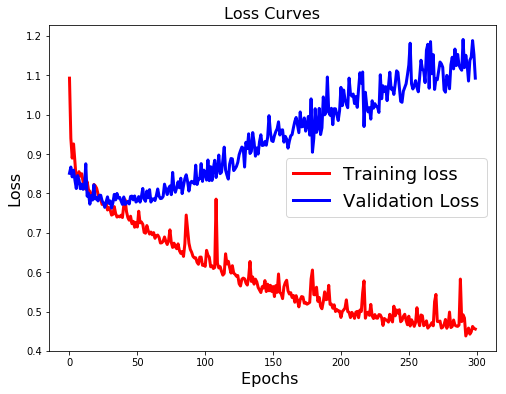

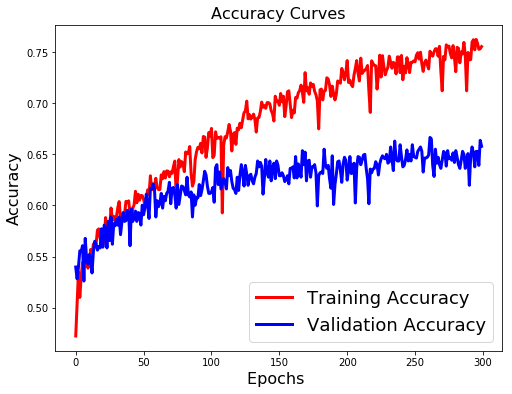

In [5]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history2['loss'],'r',linewidth=3.0)
plt.plot(history2['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2['acc'],'r',linewidth=3.0)
plt.plot(history2['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [6]:
test_data = Test['Data']
test_labels = Test['label']
np.shape(test_data)[1]

prediction_labels = model1.predict(np.expand_dims(test_data,axis=2))
prediction_on_shot = argmax(prediction_labels,1)
real_on_shot = argmax(test_labels,1)
Sum = np.sum(prediction_on_shot == real_on_shot)
Accurancy = Sum / np.shape(test_data)[0]

print(Accurancy)





0.6542207792207793


In [9]:
test1_data = test_data[0:200]
test1_label = test_labels[0:200]
test1_prediction = model1.predict(np.expand_dims(test1_data,axis=2))
test2_data = test_data[200:400]
test2_label = test_labels[200:400]
test2_prediction = model1.predict(np.expand_dims(test2_data,axis=2))
test3_data = test_data[400:600]
test3_label = test_labels[400:600]
test3_prediction = model1.predict(np.expand_dims(test3_data,axis=2))

In [ ]:

import time
t0 = time.clock()
it = 100000
for i in range(100000):
    label = model1.predict(np.expand_dims(train_data[0:1],axis=2))
t1 = time.clock() - t0
print("Time: " + str(t1/100000))


In [26]:
import pickle
model1.save("SaveModel")
with open('trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history2.history, file_pi)
Test = {'Data' : test_data, 'label' : test_labels}
with open('TestData', 'wb') as file_pi:
        pickle.dump(Test,file_pi)

AttributeError: 'dict' object has no attribute 'history'

In [17]:
test1_data = test_data[0:200]
test1_label = test_labels[0:200]
test1_prediction = model1.predict(np.expand_dims(test1_data,axis=2))
test1_prediction_one = argmax(test1_prediction,1)

test2_data = test_data[200:400]
test2_label = test_labels[200:400]
test2_prediction = model1.predict(np.expand_dims(test2_data,axis=2))
test2_prediction_one = argmax(test2_prediction,1)

test3_data = test_data[400:600]
test3_label = test_labels[400:600]
test3_prediction = model1.predict(np.expand_dims(test3_data,axis=2))
test3_prediction_one = argmax(test3_prediction,1)

test_prediction = model1.predict(np.expand_dims(test_data,axis=2))
test_prediction_one = argmax(test_prediction,1)

mdict = {'test1_data' : test1_data, 'test1_label' : test1_label, 'test1_prediction' : test1_prediction, 'test1_prediction_one' : test1_prediction_one, 
        'test2_data' : test2_data, 'test2_label' : test2_label, 'test2_prediction' : test2_prediction, 'test2_prediction_one' : test2_prediction_one,
        'test3_data' : test3_data, 'test3_label' : test3_label, 'test3_prediction' : test3_prediction, 'test3_prediction_one' : test3_prediction_one,
        'test_data': test_data, 'test_label' : test_labels, 'test_prediction' : test_prediction, 'test_prediction_one' : test_prediction_one }
scipy.io.savemat('MATLAB/Test.mat', mdict)

In [10]:
argmax(test1_prediction,1)

array([2, 0, 2, 2, 0, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0,
       2, 2, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 2, 1,
       0, 0, 0, 2, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 0, 2, 0, 2,
       0, 1, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 1,
       0, 0, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 0, 1, 1,
       2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 0, 2, 2,
       1, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 0, 1,
       0, 2, 0, 0, 0, 1, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1, 0, 2, 0, 0, 0,
       2, 0], dtype=int64)

In [7]:
np.divide(X,np.std(X,1))


ValueError: operands could not be broadcast together with shapes (6159,192) (6159,) 

In [7]:
type(history2.history)

AttributeError: 'dict' object has no attribute 'history'